In [27]:
import math
import pandas as pd
from unidecode import unidecode
import json
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
lemmatizer = WordNetLemmatizer()
# import nltk
# nltk.download('all')

lyrics_df = pd.read_csv("englishSongsWithLyrics.csv", sep=";")
song_count = len(lyrics_df)

sample = lyrics_df.loc[6,"Lyrics"]
print(sample)
print(lyrics_df.loc[1400,["Title", "Genre", "Artist"]])

with open('full_english_corpus.json', 'r') as json_file:
    corpus_dict = json.load(json_file)

line = pos_tag("And two worlds collided".split())
new_line = [lemmatizer.lemmatize(word[0], 'n') if word[1]=="NNS" else word[0] for word in line]
print(new_line)

Don't ask me
What you know is true
Don't have to tell you
I love your precious heart
Oh, I, I was standing
You were there
Two worlds collided
And they could never tear us apart
We could live, yeah
For a thousand years
But if I hurt you
I'd make wine from your tears
I told you
We could fly
'Cause we all have wings
But some of us don't know why
I was standing
And you were there
Two worlds collided
And they could never, ever tear us apart, ooh
I, I was standing
And you were there
And two worlds collided
And they could never, ever
I, I was standing
And you were there, yeah
Two worlds collided
And they could never, oh, ever, ever
I was standing
And you were there
And two worlds collided
And they could never, they could never, they could never, never
Title     Don't Pray For Me
Genre                  Rock
Artist    Within Temptation
Name: 1400, dtype: object
['And', 'two', 'world', 'collided']


In [28]:
from lib2to3.pgen2.tokenize import tokenize


stop_words = set(stopwords.words('english'))

def term_frequencies(text, remove_plurals=False):
    '''Splits the text first into a list of lines, then into a list of words in each line.
    Cleans the words by stripping punctuation from the beginning and end of words, and replacing accented characters with unaccented equivalents using unidecode.
    Returns a dictionary with all the cleaned words in the text, and the frequency with which they appear (# of times the word appears divided by total word count).'''
    line_l = text.lower().split("\n")
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    cleaned_word_dict = dict()
    total_word_count = 0
    while len(line_l)>0:
        line =  line_l.pop()
        line = unidecode(line)
        line_words_l = line.split()
        if remove_plurals:
            line_words_l = pos_tag(line_words_l)
            line_words_l = [lemmatizer.lemmatize(word[0], 'n') if word[1]=="NNS" else word[0] for word in line_words_l]
        while len(line_words_l)>0:
            word= line_words_l.pop()
            while (len(word)>0) and (word[0] not in alphabet):
                word = word[1:]
            while (len(word)>0) and (word[-1] not in alphabet): 
                word = word[:-1]
            if len(word)!=0:
                total_word_count += 1
                if word not in stop_words:
                    if word not in cleaned_word_dict:
                        cleaned_word_dict[word] = 1
                    else:
                        cleaned_word_dict[word] += 1 
    for word in cleaned_word_dict:
        cleaned_word_dict[word] = cleaned_word_dict[word]/total_word_count
    return cleaned_word_dict
    
print(term_frequencies(sample, remove_plurals = True))

{'never': 0.05333333333333334, 'could': 0.06, 'collided': 0.03333333333333333, 'world': 0.03333333333333333, 'two': 0.03333333333333333, 'standing': 0.03333333333333333, 'ever': 0.02666666666666667, 'oh': 0.013333333333333334, 'yeah': 0.013333333333333334, 'ooh': 0.006666666666666667, 'apart': 0.013333333333333334, 'us': 0.02, 'tear': 0.02, 'know': 0.013333333333333334, 'wing': 0.006666666666666667, 'cause': 0.006666666666666667, 'fly': 0.006666666666666667, 'told': 0.006666666666666667, 'wine': 0.006666666666666667, 'make': 0.006666666666666667, "i'd": 0.006666666666666667, 'hurt': 0.006666666666666667, 'year': 0.006666666666666667, 'thousand': 0.006666666666666667, 'live': 0.006666666666666667, 'heart': 0.006666666666666667, 'precious': 0.006666666666666667, 'love': 0.006666666666666667, 'tell': 0.006666666666666667, 'true': 0.006666666666666667, 'ask': 0.006666666666666667}


In [29]:

def tf_idf_scores(text, remove_plurals=False):
    tf_dict = term_frequencies(text, remove_plurals)
    tf_idf_dict = dict()
    for word in tf_dict:
        tf_idf_dict[word] = round(tf_dict[word]*math.log(song_count/corpus_dict[word]),3)
    sorted_dict= dict(sorted(tf_idf_dict.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict

tf_idf_scores(sample, remove_plurals=True)


{'collided': 0.22,
 'standing': 0.122,
 'could': 0.083,
 'tear': 0.079,
 'two': 0.07,
 'world': 0.068,
 'ever': 0.053,
 'never': 0.052,
 'apart': 0.048,
 'wing': 0.044,
 'us': 0.036,
 'precious': 0.035,
 'wine': 0.025,
 'year': 0.024,
 'thousand': 0.023,
 'fly': 0.021,
 'hurt': 0.02,
 'ask': 0.02,
 'true': 0.019,
 'live': 0.016,
 'told': 0.015,
 "i'd": 0.015,
 'oh': 0.013,
 'ooh': 0.012,
 'yeah': 0.011,
 'heart': 0.011,
 'tell': 0.009,
 'know': 0.008,
 'make': 0.008,
 'cause': 0.006,
 'love': 0.006}

In [30]:
lyrics_list = []
values_list = []

for lyrics in lyrics_df["Lyrics"]:
    scores = tf_idf_scores(lyrics)
    lyrics_list.append(", ".join(list(scores.keys())))
    values_list.append(", ".join([str(score) for score in scores.values()]))

lyrics_df["Keywords"] = lyrics_list
lyrics_df["Scores"] = values_list
lyrics_df[["Title", "Artist", "Genre", "Keywords", "Scores"]].to_csv("englishSongKeywordsNoPlurals.csv", sep =";", index=False)


In [31]:
import matplotlib.pyplot as plt

keywords_df = pd.read_csv("englishSongKeywordsNoPlurals.csv", sep=";")

for scores in keywords_df["Scores"]:
    scores = [float(score) for score in scores.split(", ")]

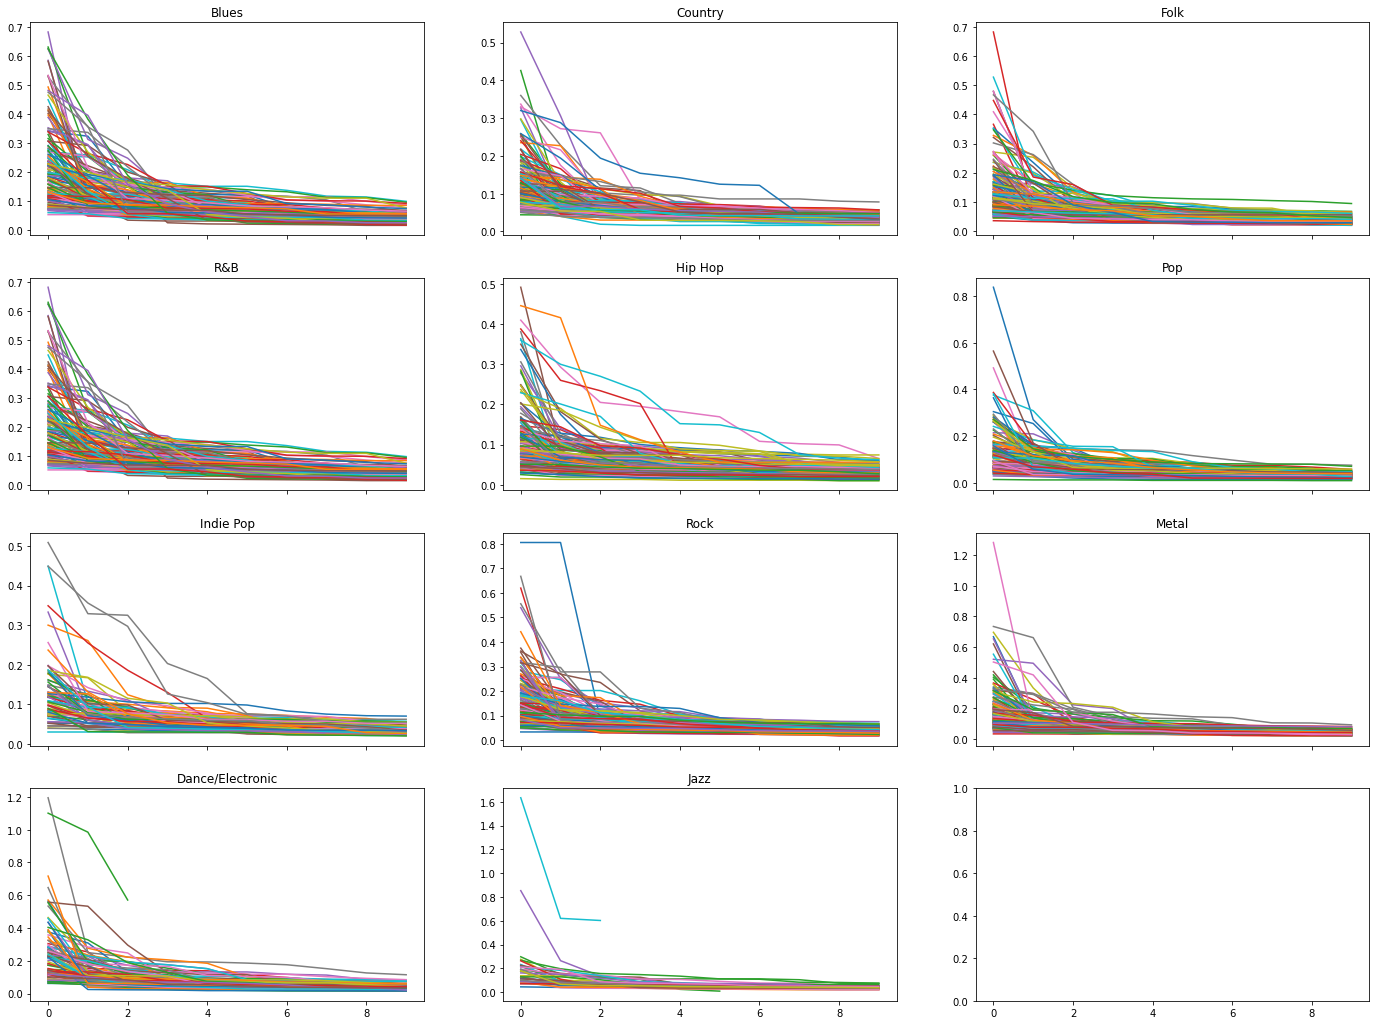

In [32]:

# length = max([len(scores.split(", ")) for scores in keywords_df["Scores"]])
# print(length)

fig, axs = plt.subplots(4, 3, sharex=True, figsize=(24, 18))

axs[0, 0].set_title('Blues')
for scores in keywords_df[keywords_df["Genre"] == "Blues"]["Scores"]:
    axs[0, 0].plot([float(score) for score in scores.split(", ")][:10])

axs[0, 1].set_title('Country')
for scores in keywords_df[keywords_df["Genre"] == "Country"]["Scores"]:
    axs[0, 1].plot([float(score) for score in scores.split(", ")][:10])

axs[0, 2].set_title('Folk')
for scores in keywords_df[keywords_df["Genre"] == "Folk"]["Scores"]:
    axs[0, 2].plot([float(score) for score in scores.split(", ")][:10])

axs[1, 0].set_title('R&B')
for scores in keywords_df[keywords_df["Genre"] == "Blues"]["Scores"]:
    axs[1, 0].plot([float(score) for score in scores.split(", ")][:10])

axs[1, 1].set_title('Hip Hop')
for scores in keywords_df[keywords_df["Genre"] == "Hip Hop"]["Scores"]:
    axs[1, 1].plot([float(score) for score in scores.split(", ")][:10])

axs[1, 2].set_title('Pop')
for scores in keywords_df[keywords_df["Genre"] == "Pop"]["Scores"]:
    axs[1, 2].plot([float(score) for score in scores.split(", ")][:10])

axs[2, 0].set_title('Indie Pop')
for scores in keywords_df[keywords_df["Genre"] == "Indie Pop"]["Scores"]:
    axs[2, 0].plot([float(score) for score in scores.split(", ")][:10])

axs[2, 1].set_title('Rock')
for scores in keywords_df[keywords_df["Genre"] == "Rock"]["Scores"]:
    axs[2, 1].plot([float(score) for score in scores.split(", ")][:10])

axs[2, 2].set_title('Metal')
for scores in keywords_df[keywords_df["Genre"] == "Metal"]["Scores"]:
    axs[2, 2].plot([float(score) for score in scores.split(", ")][:10])

axs[3, 0].set_title('Dance/Electronic')
for scores in keywords_df[keywords_df["Genre"] == "Dance/Electronic"]["Scores"]:
    axs[3, 0].plot([float(score) for score in scores.split(", ")][:10])

axs[3, 1].set_title('Jazz')
for scores in keywords_df[keywords_df["Genre"] == "Jazz"]["Scores"]:
    axs[3, 1].plot([float(score) for score in scores.split(", ")][:10])

plt.show()